<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-2--online-ad-clicks/04_analyzing_tables_using_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analyzing tables using Pandas

Data tables are commonly used to store information.

The formatting of a table isn’t
important. What is important is its structure. All tables have structural features in
common: every table contains horizontal rows and vertical columns, and quite
often, column headers also hold explicit column names.

##Setup

In [45]:
from collections import defaultdict
import itertools

import numpy as np
import pandas as pd
from scipy import stats
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Penalizing centers using the squared distance from the minimum
def squared_distance(value1, value2):
  return (value1 - value2) ** 2

In [3]:
# Penalizing centers using the total sum of squared distances
def sum_of_squared_distances(value, measurements):
  return sum(squared_distance(value, m) for m in measurements)

In [4]:
# Computing California’s sum of squares
def sum_of_squares(data):
  mean = np.mean(data)
  return sum(squared_distance(value, mean) for value in data)

In [5]:
# Computing the variance from mean squared distance
def variance(data):
  mean = np.mean(data)
  return np.mean([squared_distance(value, mean) for value in data])

In [6]:
# Computing the weighted variance using np.average
def weighted_variance(data, weights):
  mean = np.average(data, weights=weights)
  squared_distances = [squared_distance(value, mean) for value in data]
  return np.average(squared_distances, weights=weights)

assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

##Storing tables using basic Python

Let’s define a sample table in Python. The table stores measurements for various species
of fish, in centimeters. 

Our measurement table contains three columns: Fish,
Length, and Width.

In [7]:
# Storing a table using Python data structures
fish_measures = {
    "Fish": ["Angelfish", "Zebrafish", "Killifish", "Swordtail"],
    "Length": [15.2, 6.5, 9, 6],
    "Width": [7.7, 2.1, 4.5, 2]
}

In [8]:
# Accessing table columns using a dictionary
zebrafish_index = fish_measures["Fish"].index("Zebrafish")
zebrafish_length = fish_measures["Length"][zebrafish_index]

print(f"The length of a zebrafish is {zebrafish_length:.2f} cm")

The length of a zebrafish is 6.50 cm


A better solution
is provided by the Pandas library, which is designed for table manipulation.

##Exploring tables using Pandas

In [9]:
# Loading a table into Pandas
df = pd.DataFrame(fish_measures)
print(df)

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0


In [10]:
# Accessing the first two rows of a table
print(df.head(2))

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1


In [11]:
# Summarizing the numeric columns
print(df.describe())

          Length     Width
count   4.000000  4.000000
mean    9.175000  4.075000
std     4.225616  2.678775
min     6.000000  2.000000
25%     6.375000  2.075000
50%     7.750000  3.300000
75%    10.550000  5.300000
max    15.200000  7.700000


In [12]:
# Computing the column mean
print(df.mean())

Length    9.175
Width     4.075
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [13]:
# Summarizing the string columns
print(df.describe(include=[object]))

             Fish
count           4
unique          4
top     Angelfish
freq            1


In [14]:
# Retrieving the table as a 2D NumPy array
print(df.values)

[['Angelfish' 15.2 7.7]
 ['Zebrafish' 6.5 2.1]
 ['Killifish' 9.0 4.5]
 ['Swordtail' 6.0 2.0]]


In [15]:
assert type(df.values) == np.ndarray

##Retrieving table columns

Let’s turn our attention to retrieving individual columns, which can be accessed
using their column names.

In [16]:
# Accessing all column names
print(df.columns)

Index(['Fish', 'Length', 'Width'], dtype='object')


In [17]:
# Accessing an individual column
print(df.Fish)

0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Fish, dtype: object


In [18]:
print(df.Length)

0    15.2
1     6.5
2     9.0
3     6.0
Name: Length, dtype: float64


In [19]:
# Retrieving a column as a NumPy array
print(df.Fish.values)

['Angelfish' 'Zebrafish' 'Killifish' 'Swordtail']


In [20]:
# Accessing a column using brackets
print(df["Fish"])

0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Fish, dtype: object


In [21]:
# Accessing multiple columns using brackets
print(df[["Fish", "Length"]])

        Fish  Length
0  Angelfish    15.2
1  Zebrafish     6.5
2  Killifish     9.0
3  Swordtail     6.0


In [22]:
# Sorting rows by column value
print(df.sort_values("Length"))

        Fish  Length  Width
3  Swordtail     6.0    2.0
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
0  Angelfish    15.2    7.7


In [23]:
# Filtering rows by column value
print(df[df.Width >= 3])

        Fish  Length  Width
0  Angelfish    15.2    7.7
2  Killifish     9.0    4.5


##Retrieving table rows

Unlike columns, our rows do
not have preassigned label values. 

To compensate, Pandas assigns a special index to each row.

As a general
rule, executing `df.loc[[index_list]]` locates all the rows whose indices
appear in `index_list`.

In [24]:
print(df)

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0


In [25]:
# Accessing rows by index
print(df.loc[[0, 3]])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [26]:
print(df.loc[[2, 3]])

        Fish  Length  Width
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0


In [27]:
# Accessing rows by column value
booleans = [name in ["Angelfish", "Swordtail"] for name in df.Fish]
print(df[booleans])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [28]:
# Accessing rows by column value
print(df[df.Fish.isin(["Angelfish", "Swordtail"])])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [29]:
# Swapping row indices for column values
df.set_index("Fish", inplace=True)
print(df)

           Length  Width
Fish                    
Angelfish    15.2    7.7
Zebrafish     6.5    2.1
Killifish     9.0    4.5
Swordtail     6.0    2.0


In [30]:
# Accessing rows by string index
print(df.loc[["Angelfish", "Swordtail"]])

           Length  Width
Fish                    
Angelfish    15.2    7.7
Swordtail     6.0    2.0


##Modifying table rows and columns

What will happen if we swap our rows and columns? 

We can find out by running `df.T`. The `T`
stands for transpose: in a transpose operation, the elements of a table are flipped around its diagonal so that the rows and columns are switched.

In [31]:
# Swapping rows and columns
df_transposed = df.T
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail
Length       15.2        6.5        9.0        6.0
Width         7.7        2.1        4.5        2.0


In [32]:
# Printing a transposed column
print(df_transposed.Swordtail)

Length    6.0
Width     2.0
Name: Swordtail, dtype: float64


In [33]:
# Adding a new column
df_transposed["Clownfish"] = [10.6, 3.7]
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


In [34]:
# Adding multiple new columns
df_new = df_transposed.assign(Clownfish2=[10.6, 3.7], Clownfish3=[10.6, 3.7])
assert "Clownfish2" not in df_transposed.columns
assert "Clownfish2" in df_new.columns

print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish  Clownfish2  \
Length       15.2        6.5        9.0        6.0       10.6        10.6   
Width         7.7        2.1        4.5        2.0        3.7         3.7   

Fish    Clownfish3  
Length        10.6  
Width          3.7  


In [35]:
# Deleting multiple columns
df_new.drop(columns=["Clownfish2", "Clownfish3"], inplace=True)

In [36]:
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


In [37]:
# Iterating over column values
areas = []
for fish_species, (length, width) in df_new.items():
  area = math.pi * length * width / 4
  print(f"Area of {fish_species} is {area}")
  areas.append(area)

Area of Angelfish is 91.92300104403735
Area of Zebrafish is 10.720684930375171
Area of Killifish is 31.808625617596654
Area of Swordtail is 9.42477796076938
Area of Clownfish is 30.80331596844792


In [38]:
# Adding a new row
df_new.loc["Area"] = areas
df_new.reindex()
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316


In [39]:
# Checking the table shape
row_count, column_count = df_new.shape
print(f"Our table contains {row_count} rows and {column_count} columns")

Our table contains 3 rows and 5 columns


##Saving and loading table data

In [40]:
# Saving a table to a CSV file
df_new.to_csv("fish_measurements.csv")

with open("fish_measurements.csv") as f:
  print(f.read())

,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7
Area,91.92300104403735,10.720684930375171,31.808625617596654,9.42477796076938,30.80331596844792



In [41]:
# Loading a table from a CSV file
df = pd.read_csv("fish_measurements.csv", index_col=0)
print(df)

        Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316


In [42]:
print("\nRow index names when column is assigned:")
print(df.index.values)


Row index names when column is assigned:
['Length' 'Width' 'Area']


In [43]:
df_no_assign = pd.read_csv("fish_measurements.csv")
print("\nRow index names when no column is assigned:")
print(df_no_assign.index.values)


Row index names when no column is assigned:
[0 1 2]


##Visualizing tables using Seaborn

A heatmap is a graphical representation of a table in
which numeric cells are colored by value; the color shades shift continuously depending
on the value size. The end result is a bird’s-eye view of value differences in the table.

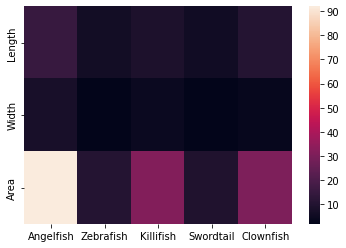

In [46]:
# Visualizing a heatmap using Seaborn
sns.heatmap(df)
plt.show()

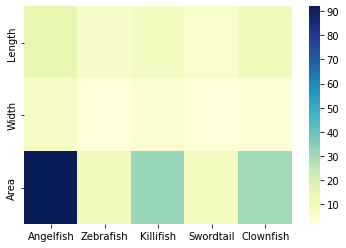

In [47]:
# Adjusting heatmap colors
sns.heatmap(df, cmap="YlGnBu")
plt.show()

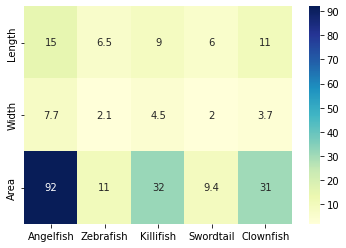

In [48]:
# Annotating the heatmap
sns.heatmap(df, cmap="YlGnBu", annot=True)
plt.show()

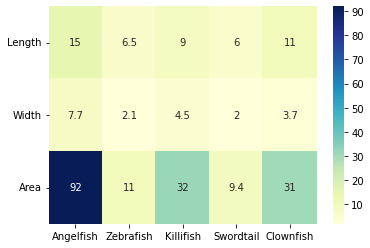

In [49]:
# Rotating heatmap labels using Matplotlib
sns.heatmap(df, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.show()

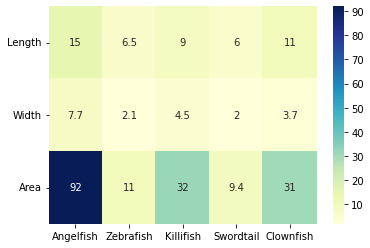

In [50]:
# Visualizing a heatmap from a NumPy array
sns.heatmap(df.values,   # df.values returns a 2D NumPy array
            cmap="YlGnBu", 
            annot=True,
            xticklabels=df.columns,
            yticklabels=df.index)
plt.yticks(rotation=0)
plt.show()